<font size=18>Analyse préliminaire de classification d'articles</font>

In [2]:
!python --version

Python 3.9.18


In [3]:
#builtin
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import datetime
import os, sys, time, random

#data
import pandas as pd
import numpy as np

#nlp
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import words, stopwords

# viz
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


# Préparation

## Download et options

In [6]:
# download
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt_tab')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cedric\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cedric\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cedric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\cedric\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cedric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
#init sns
sns.set()

## chargement des données

In [9]:
#fichier données 
data = './data/source/'
os.listdir(data)

['.ipynb_checkpoints',
 'flipkart_com-ecommerce_sample_1050.csv',
 'Images',
 'images_triees',
 'images_triees_test']

In [10]:
#chargement dataframe
fn = data + 'flipkart_com-ecommerce_sample_1050.csv'
df = pd.read_csv(fn)
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [11]:
df.shape

(1050, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [13]:
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [14]:
df=df[['description','image','product_category_tree']].copy()

In [15]:
df

description  \
0     Key Features of Elegance Polyester Multicolor ...   
1     Specifications of Sathiyas Cotton Bath Towel (...   
2     Key Features of Eurospa Cotton Terry Face Towe...   
3     Key Features of SANTOSH ROYAL FASHION Cotton P...   
4     Key Features of Jaipur Print Cotton Floral Kin...   
...                                                 ...   
1045  Oren Empower Extra Large Self Adhesive Sticker...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                                     image  \
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                    ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44.jpg   

                                  product_category_tree  
0     ["Home Furnishing >> Curtains & Accessories >>...  
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  
...                                                 ...  
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  

[1050 rows x 3 columns]

In [16]:
def extractCateg(chaine):
    chaine=chaine.replace('["', '').split(' >> ')[0]
    return chaine


df['category']=df.product_category_tree.apply(extractCateg)
df['category'].value_counts()

category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

# Nettoyage des textes

## Fonction de nettoyage

In [19]:
def processText(doc,
                  rejoin=False,
                  lemm_or_stemm='stem',
                  list_rare_words=None,
                  min_len_word=3,
                  force_is_alpha=True,
                  eng_words=None,
                  extra_words=None,
                  stop_words=None,
                  test=None) : 
    """
    cf process_text_1 but with list_unique_words, min_len_word, and force_is_alpha

    positional arguments :
    -----------------------------------------------------------
    doc : str : the document to process (text in str format)

    opts args :
    -----------------------------------------------------------
    rejoin : bool : si True retourne une string sinon retourne une liste de tokens
    lemm_or_stemm : str : si lem lemmentize sinon stemmentize
    list_rare_words : list : liste des mots rare a exclure
    min_len_word : int : le minimum des mots a ne pas exclure
    force_is_alpha : int : si 1, exclue tous les tokens avec un caractere numérique
    eng_words : list : liste de mots anglais
    extra_words : list : liste des mots a enlever

    return :
    -----------------------------------------------------------
    une string (si rejoin est True) ou une liste de tokens
    """

    # list_unique_words
    if not list_rare_words :
        list_rare_words = []
    if test:
        print(f'\nTexte original ({len(doc)} caractères): {doc}')

    # lower
    doc = doc.lower().strip()
    if test:
        print(f'\nPassage minuscule ({len(doc)} caractères): {doc}')

    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    if test:
        print(f'\nTokenisation ({len(raw_tokens_list)} mots): {raw_tokens_list}')

    # classics stopwords
    if stop_words:
        cleaned_tokens_list = [ w for w in raw_tokens_list if w not in stop_words]
    else:
        cleaned_tokens_list = raw_tokens_list
    if test:
        print(f'\nSuppression stopwords ({len(cleaned_tokens_list)} mots): {cleaned_tokens_list}')

    ##############################################################################

    #no rare tokens
    non_rare_tokens = [ w for w in cleaned_tokens_list if w not in list_rare_words]
    if test:
        print(f'\nSuppression mots rares ({len(non_rare_tokens)} mots): {non_rare_tokens}')

    # no more len words
    more_than_N = [ w for w in non_rare_tokens if len(w) >= min_len_word]
    if test:
        print(f'\nSuppression mots au dessous de {min_len_word} lettres ({len(more_than_N)} mots): {more_than_N}')

    # only alpha chars
    if force_is_alpha :
        alpha_tokens = [ w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    if test:
        print(f'\nCaractères alpha ({len(alpha_tokens)} mots): {alpha_tokens}')

    ##############################################################################

    # stem or lem
    if lemm_or_stemm == 'lem' :
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    if test:
        print(f'\nApplication de {lemm_or_stemm} ({len(trans_text)} mots): {trans_text}')

    ##############################################################################

    # in english
    if eng_words :
        engl_text = [ i for i in trans_text if i in eng_words]
    else :
        engl_text = trans_text
    if test:
        print(f'\nFiltre dictionnaire anglais ({len(engl_text)} mots): {engl_text}')

    ##############################################################################

    # drop extra_words tokens
    if extra_words :
        final = [ w for w in engl_text if w not in extra_words]
    else:
        final = engl_text
    if test:
        print(f'\nSuppression d\'extra-words ({len(final)} mots): {final}')

    ##############################################################################

    # Gestion du retour
    if rejoin :
        return " ".join(final)
    return final

In [20]:
def display_tokens_info(tokens,echantillon=None):
    """affichage infos corpus"""
    retour=f'nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}'
    if echantillon != None:
        print(f'\n échantillon :\n{tokens[:30]}')
    return retour

## Stopwords

In [22]:
eng_words = [i.lower() for i in words.words()]
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]

In [23]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'between', 'should', 'by', 'because', 'from', 've', 'isn', 'same', 'its', 'has', 'had', 'too', 's', 'you', 'herself', 'is', 'a', 'that', 'can', 'just', 'shouldn', 'yours', 'her', 'into', 'haven', 'as', 'they', 'whom', 'other', 'hasn', 'where', 'myself', 'shan', 'while', 'your', 'on', 'doing', 're', 'doesn', 'this', 'the', 'ain', 'does', 'couldn', 'out', 'nor', 'll', 'very', 'only', "haven't", "you'd", 'was', 'it', 'than', 'ours', 'now', 'then', 'so', 'own', 'at', 'some', 'their', 'against', 'being', 'above', 'have', 'weren', 'he', 'who', 'until', 'will', "wouldn't", 'over', 'ourselves', 'yourself', 'down', 'after', 'such', 'any', 'not', 'been', 'd', "isn't", 'our', 'up', 'she', 'those', 'his', "mightn't", 'further', 'himself', 'with', 'hadn', "you've", 'me', 'do', 'under', "should've", 'through', 'aren', 'during', 'each', 'for', 'i', 'themselves', "she's", 'which', 'are', 'if', 'didn', 'an', 'y', 'in', 'having', "couldn't", 'once', "you'll", 't', 'off', "don't", 'were', 'm', 'when', '

In [24]:
display_tokens_info(df.description[1])

'nb tokens 444, nb tokens uniques 48'

In [25]:
# rassemblement du corpus entier
raw_corpus = "".join(df.description.values)
print(f'\néchantillon de tokens du corpus : \n{raw_corpus[:1000]}')

# nombre de valeurs dans le corpus
print(f'\nnombre de tokens dans le corpus : {len(raw_corpus)}')

# traitement du corpus entier et comptage des individus
corpus = processText(raw_corpus)
print(f'\nétat après traitement du corpus : {display_tokens_info(corpus)}')


échantillon de tokens du corpus : 
Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly fil

In [26]:
mots_corpus = pd.Series(corpus).value_counts()
mots_rares = mots_corpus[mots_corpus==1]
print(f'\nmots rares : {len(mots_rares)}')
liste_mots_rares = list(mots_rares.index)
mots_rares = pd.DataFrame({'words' : liste_mots_rares})
mots_rares.to_csv('mots_rares.csv', index=False)


mots rares : 1166


In [27]:
mots_min_5 = mots_corpus[mots_corpus<=5]
print(f'\nmots presents jusqu\'a 5 fois : {len(mots_min_5)}')
liste_mots_min_5 = list(mots_min_5.index)
mots_min_5 = pd.DataFrame({'words' : liste_mots_min_5})
mots_min_5.to_csv('mots_min_5.csv', index=False)


mots presents jusqu'a 5 fois : 2812


In [28]:
mots_min_10 = mots_corpus[mots_corpus<=10]
print(f'\nmots presents jusqu\'a 10 fois : {len(mots_min_10)}')
liste_mots_min_10 = list(mots_min_10.index)
mots_min_10 = pd.DataFrame({'words' : liste_mots_min_10})
mots_min_10.to_csv('mots_min_10.csv', index=False)


mots presents jusqu'a 10 fois : 3264


In [29]:
mots_corpus.head(30)

for         1436
the         1369
and         1332
onli         890
product      869
with         843
your         656
free         618
replac       570
ship         569
deliveri     567
cash         564
genuin       564
price        561
day          553
buy          543
flipkart     475
guarante     473
com          468
mug          448
thi          444
featur       408
design       401
onlin        396
from         382
color        374
you          360
watch        359
pack         342
type         325
Name: count, dtype: int64

In [30]:
mots_corpus.tail(30)

oshea        1
anjeer       1
mattegel     1
lotu         1
perfrect     1
crew         1
vlcc         1
commend      1
miss         1
jove         1
carrot       1
patron       1
spectrum     1
begin        1
ritual       1
convent      1
christ       1
anthelio     1
posay        1
roch         1
hydrat       1
sunblock     1
aveeno       1
expos        1
sweden       1
oriflam      1
ackey        1
longdress    1
whiteherb    1
dir          1
Name: count, dtype: int64

In [31]:
mots_corpus = pd.Series(corpus).value_counts()
mots_communs = mots_corpus[mots_corpus>=360]
print(f'\nmots communs : {len(mots_communs)}')
liste_mots_communs = list(mots_communs.index)
mots_communs = pd.DataFrame({'words' : liste_mots_communs})
mots_communs.to_csv('mots_rares.csv', index=False)


mots communs : 27


In [32]:
liste_mots_communs

['for',
 'the',
 'and',
 'onli',
 'product',
 'with',
 'your',
 'free',
 'replac',
 'ship',
 'deliveri',
 'cash',
 'genuin',
 'price',
 'day',
 'buy',
 'flipkart',
 'guarante',
 'com',
 'mug',
 'thi',
 'featur',
 'design',
 'onlin',
 'from',
 'color',
 'you']

## Test avant cleanning

In [34]:
processText(df.description[42],
            rejoin=True,
            lemm_or_stemm='lemm',
            list_rare_words=liste_mots_rares,
            eng_words=eng_words_stem,
            extra_words=liste_mots_communs,
            stop_words=stop_words,
            test=1)


Texte original (484 caractères): Key Features of Mom and Kid Baby Girl's Printed Blue, Grey Top & Pyjama Set Fabric: Cotton Brand Color: Blue, Grey,Mom and Kid Baby Girl's Printed Blue, Grey Top & Pyjama Set Price: Rs. 309 Girls Pyjamaset,Specifications of Mom and Kid Baby Girl's Printed Blue, Grey Top & Pyjama Set General Details Pattern Printed Ideal For Baby Girl's Night Suit Details Number of Contents in Sales Package Pack of 1 Fabric Cotton Type Top & Pyjama Set Neck Round Nack In the Box 1 Top & Pyjama Set

Passage minuscule (484 caractères): key features of mom and kid baby girl's printed blue, grey top & pyjama set fabric: cotton brand color: blue, grey,mom and kid baby girl's printed blue, grey top & pyjama set price: rs. 309 girls pyjamaset,specifications of mom and kid baby girl's printed blue, grey top & pyjama set general details pattern printed ideal for baby girl's night suit details number of contents in sales package pack of 1 fabric cotton type top & pyjama set neck 

'key kid babi girl print blue grey top pyjama set fabric cotton brand blue grey kid babi girl print blue grey top pyjama set girl specif kid babi girl print blue grey top pyjama set gener detail pattern print ideal babi girl night suit detail number content sale packag pack fabric cotton type top pyjama set neck round box top pyjama set'

In [35]:
chaineTest = processText("Color: Blue, Grey,Mom and Kid Baby Girl's Printed Blue, Grey Top & Pyjama Set Price: Rs. 309 ",
            rejoin=False,
            lemm_or_stemm='lemm',
            list_rare_words=liste_mots_rares,
            eng_words=eng_words_stem,
            extra_words=liste_mots_communs,
            stop_words=stop_words,
            test=1)


Texte original (93 caractères): Color: Blue, Grey,Mom and Kid Baby Girl's Printed Blue, Grey Top & Pyjama Set Price: Rs. 309 

Passage minuscule (92 caractères): color: blue, grey,mom and kid baby girl's printed blue, grey top & pyjama set price: rs. 309

Tokenisation (18 mots): ['color', 'blue', 'grey', 'mom', 'and', 'kid', 'baby', 'girl', 's', 'printed', 'blue', 'grey', 'top', 'pyjama', 'set', 'price', 'rs', '309']

Suppression stopwords (16 mots): ['color', 'blue', 'grey', 'mom', 'kid', 'baby', 'girl', 'printed', 'blue', 'grey', 'top', 'pyjama', 'set', 'price', 'rs', '309']

Suppression mots rares (16 mots): ['color', 'blue', 'grey', 'mom', 'kid', 'baby', 'girl', 'printed', 'blue', 'grey', 'top', 'pyjama', 'set', 'price', 'rs', '309']

Suppression mots au dessous de 3 lettres (15 mots): ['color', 'blue', 'grey', 'mom', 'kid', 'baby', 'girl', 'printed', 'blue', 'grey', 'top', 'pyjama', 'set', 'price', '309']

Caractères alpha (14 mots): ['color', 'blue', 'grey', 'mom', 'kid', 'baby'

## Clean Text

In [37]:
def cleanText(doc) :
    """lancement du nettoyage final"""
    new_doc = processText(doc,
                  rejoin=True,
                  lemm_or_stemm='lemm',
                  list_rare_words=liste_mots_rares,
                  eng_words=eng_words_stem,
                  extra_words=None)
    return new_doc

In [38]:
temps_cleaning_debut = time.time()
df['clean_description'] = df.description.apply(cleanText)
temps_cleaning = np.round(time.time() - temps_cleaning_debut,4)

In [39]:
df.sample(10)

description  \
604  Buy HP 15-ac116TX (Notebook) (Core i3 (5th Gen...   
542  Maxima 01741LPLN Analog Watch  - For Women - B...   
727  Buy Gift Studios Ganesha Stone Showpiece  -  1...   
880  Maspar Cotton Set of Towels (One Beach Towel, ...   
24   fastrack 38015PL01 Analog Watch  - For Men, Bo...   
789  Buy Love Baby Cartoon Set of Towels at Rs. 425...   
401  Flipkart.com: Buy Denim Deo Combo Set online o...   
143  Buy Prithish Warm Up The Evil In Me Double Col...   
432  Key Features of Smartpro 19.5v,3.9a Replacemen...   
247  Buy Leo Natura Paniarakkal 7 Hole Kadhai NA L ...   

                                    image  \
604  85aec4bf3185da7ebcc45003429cbfe2.jpg   
542  3fa21f35257649e1513ca4ce22c6a68c.jpg   
727  fd75569f00649bda69d490d54e01378c.jpg   
880  fc3eb6ffed257270c26943e9f9c347b9.jpg   
24   653826cd53f1d9e2c086c0ac7846ef70.jpg   
789  389197b67a189c703f3deb9ca6f1f678.jpg   
401  50be4cd92fda2755e1e884421a52e345.jpg   
143  a1fd886094826c3f25c6ffb380073974.jpg   
432  7f2f1f3039d1f5bc23226fc36577eab9.jpg   
247  87f1807e002d3555b8dfb465a8a61df2.jpg   

                                 product_category_tree  \
604             ["Computers >> Laptops >> HP Laptops"]   
542  ["Watches >> Wrist Watches >> Maxima Wrist Wat...   
727  ["Home Decor & Festive Needs >> Table Decor & ...   
880        ["Home Furnishing >> Bath Linen >> Towels"]   
24   ["Watches >> Wrist Watches >> fastrack Wrist W...   
789  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
401  ["Beauty and Personal Care >> Fragrances >> De...   
143  ["Kitchen & Dining >> Coffee Mugs >> Prithish ...   
432  ["Computers >> Laptop Accessories >> Adapters ...   
247  ["Kitchen & Dining >> Cookware >> Pots & Pans ...   

                       category  \
604                   Computers   
542                     Watches   
727  Home Decor & Festive Needs   
880             Home Furnishing   
24                      Watches   
789                   Baby Care   
401    Beauty and Personal Care   
143            Kitchen & Dining   
432                   Computers   
247            Kitchen & Dining   

                                     clean_description  
604  buy notebook core gen graph for also get noteb...  
542  maxima analog watch for buy maxima analog watc...  
727  buy gift studio stone showpiec for gift studio...  
880  cotton set towel one beach towel red price per...  
24   analog watch for men boy buy analog watch for ...  
789  buy love babi cartoon set towel onli genuin pr...  
401  buy denim set onli for from onli genuin produc...  
143  buy warm the evil doubl color ceram mug for wa...  
432  key featur replac charger for seri adapt desig...  
247  buy leo hole for leo hole best price with free...

# Bag of Words (CountVectorizer)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

mots_minimums = 1

temps_CountVectorizer_debut = time.time()

# Initialize the CountVectorizer
vectorizer = CountVectorizer(min_df=mots_minimums)

# Fit and transform the corpus to a document-term matrix
X = vectorizer.fit_transform(df.clean_description)
temps_CountVectorizer = np.round(time.time() - temps_CountVectorizer_debut,4)

# Convert the document-term matrix into a dense format (optional for visualization)
BoW_X_dense = X.toarray()

# Get the vocabulary (mapping of words to index positions)
vocab = vectorizer.get_feature_names_out()

# Print the vocabulary and document-term matrix
#print("Vocabulaire:", vocab)
print(f'Vocabulaire contient {len(vocab)} mots')
#print("Matrice des mots:\n", X_dense)

Vocabulaire contient 2665 mots


# TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the Tf-idf vectorizer
temps_TfidfVectorizer_debut = time.time()
vectoriseurTfidf = TfidfVectorizer()
# Fit and transform the corpus
X_tfidf = vectoriseurTfidf.fit_transform(df.clean_description)
temps_TfidfVectorizer = np.round(time.time() - temps_TfidfVectorizer_debut,4)
# Show the Vocabulary
print("Vocabulaire:", vectoriseurTfidf.get_feature_names_out())
# Show the TF-IDF Matrix
print("Representation TF-IDF:")
print(X_tfidf.toarray())

Vocabulaire: ['abil' 'abl' 'abod' ... 'zinc' 'zipper' 'zone']
Representation TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Détermination des paramètres PCA

In [45]:
"""
utilisation de la librairie pca erdogant
 https://erdogant.github.io/pca/pages/html/index.html 
"""
#!pip install pca


'\nutilisation de la librairie pca erdogant\n https://erdogant.github.io/pca/pages/html/index.html \n'

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [2665] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [493] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [2665] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[493]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 493 Principal Components explain [95.06%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

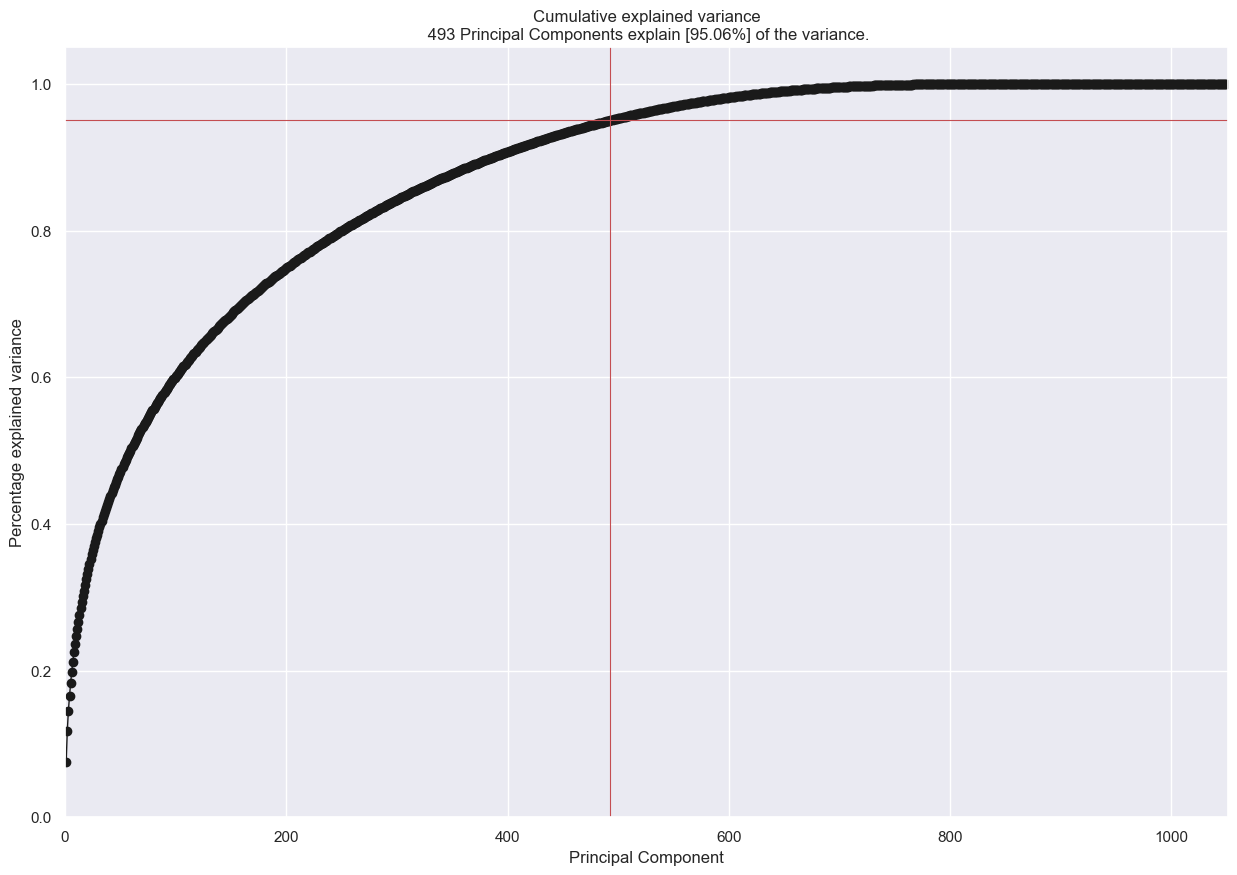

In [46]:
from pca import pca
model_pca = pca()
pca_result = model_pca.fit_transform(X_tfidf.toarray())
model_pca.plot()

[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


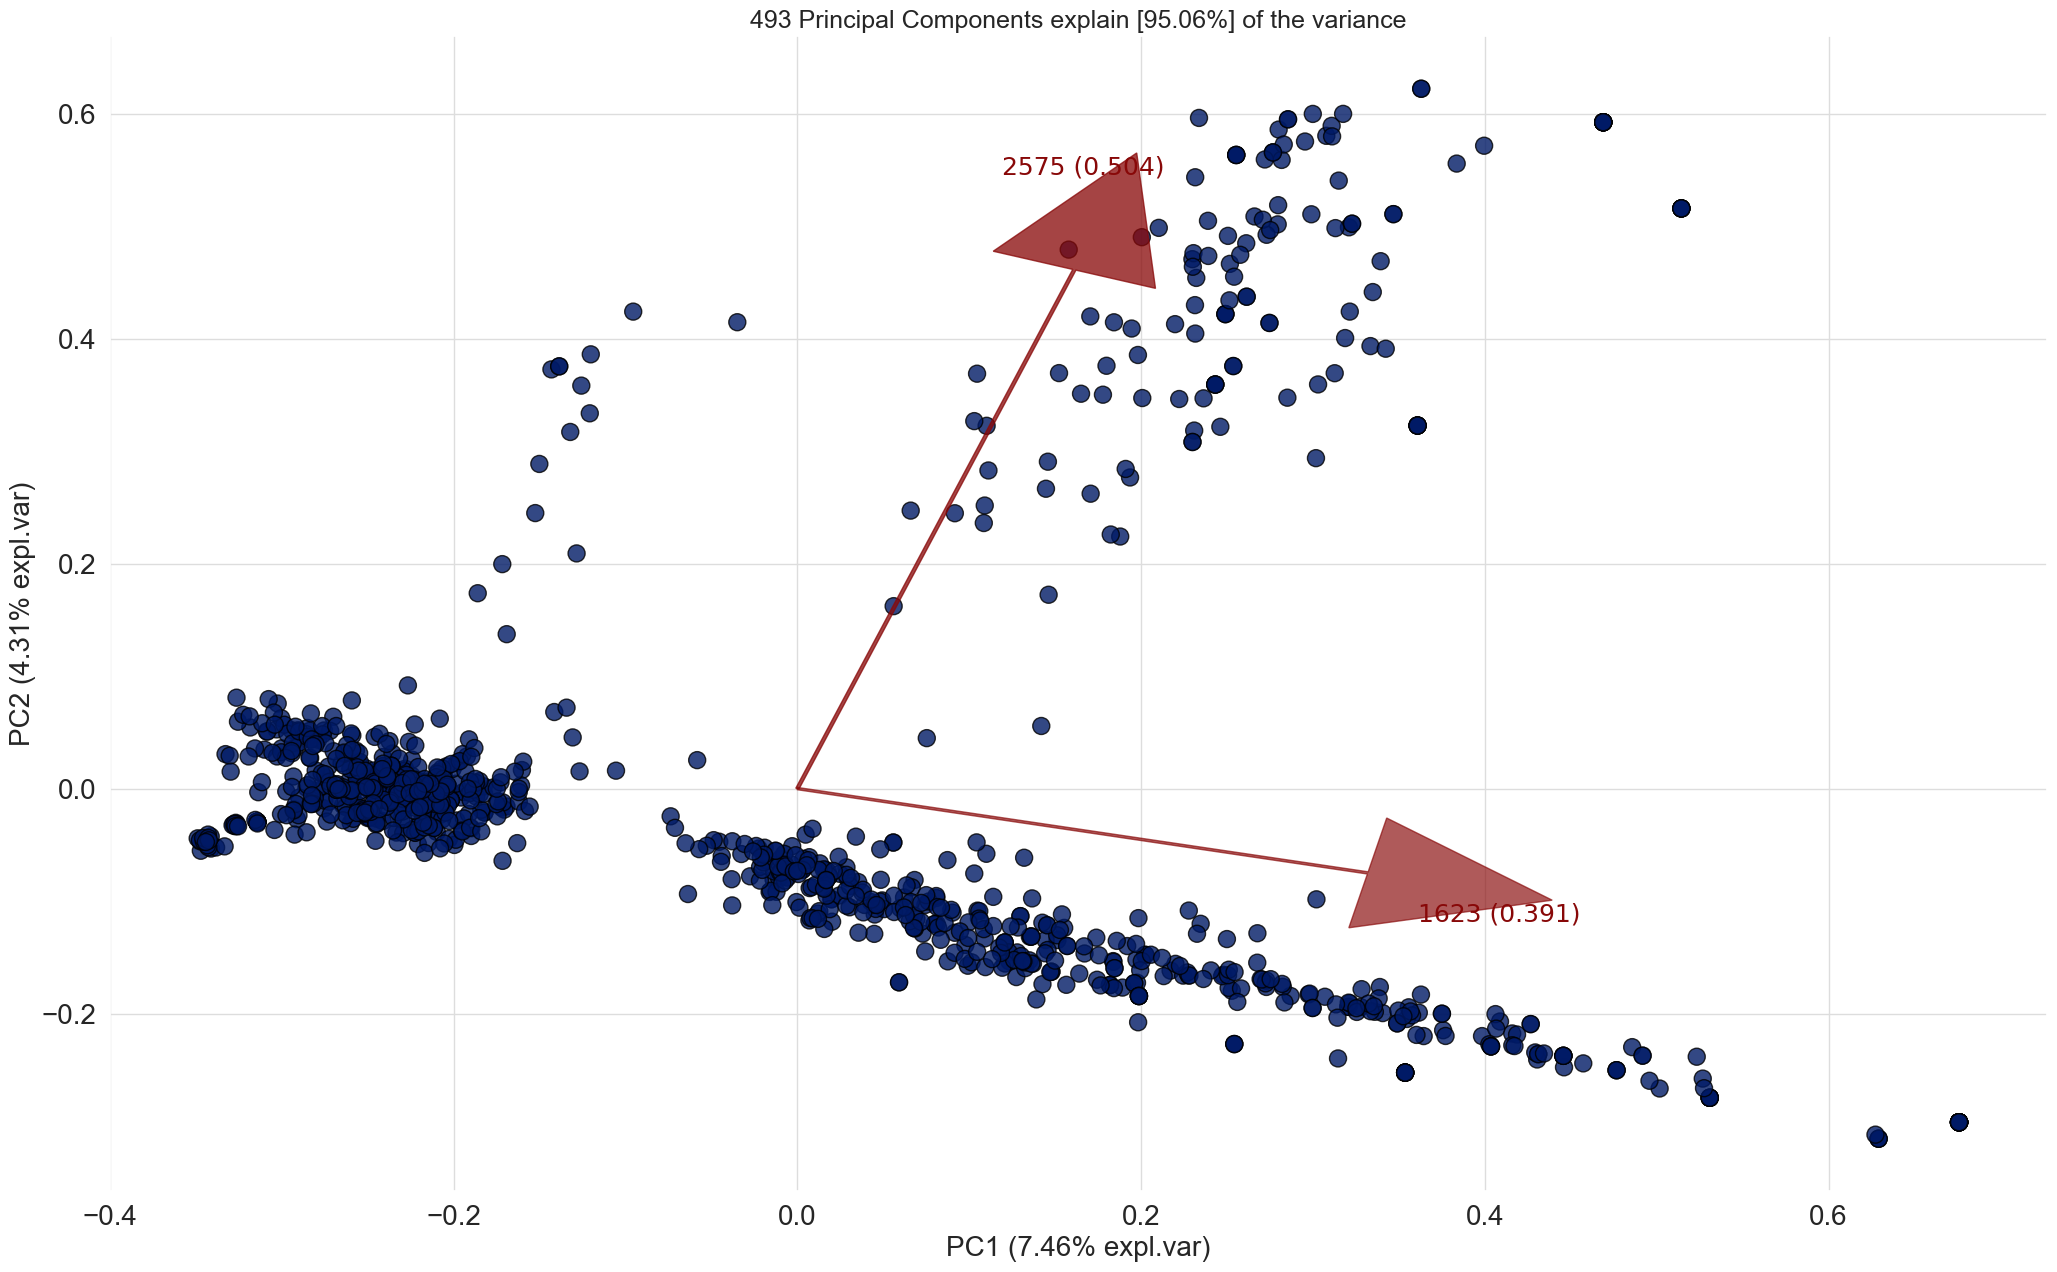

In [47]:
ax = model_pca.biplot(n_feat=2, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


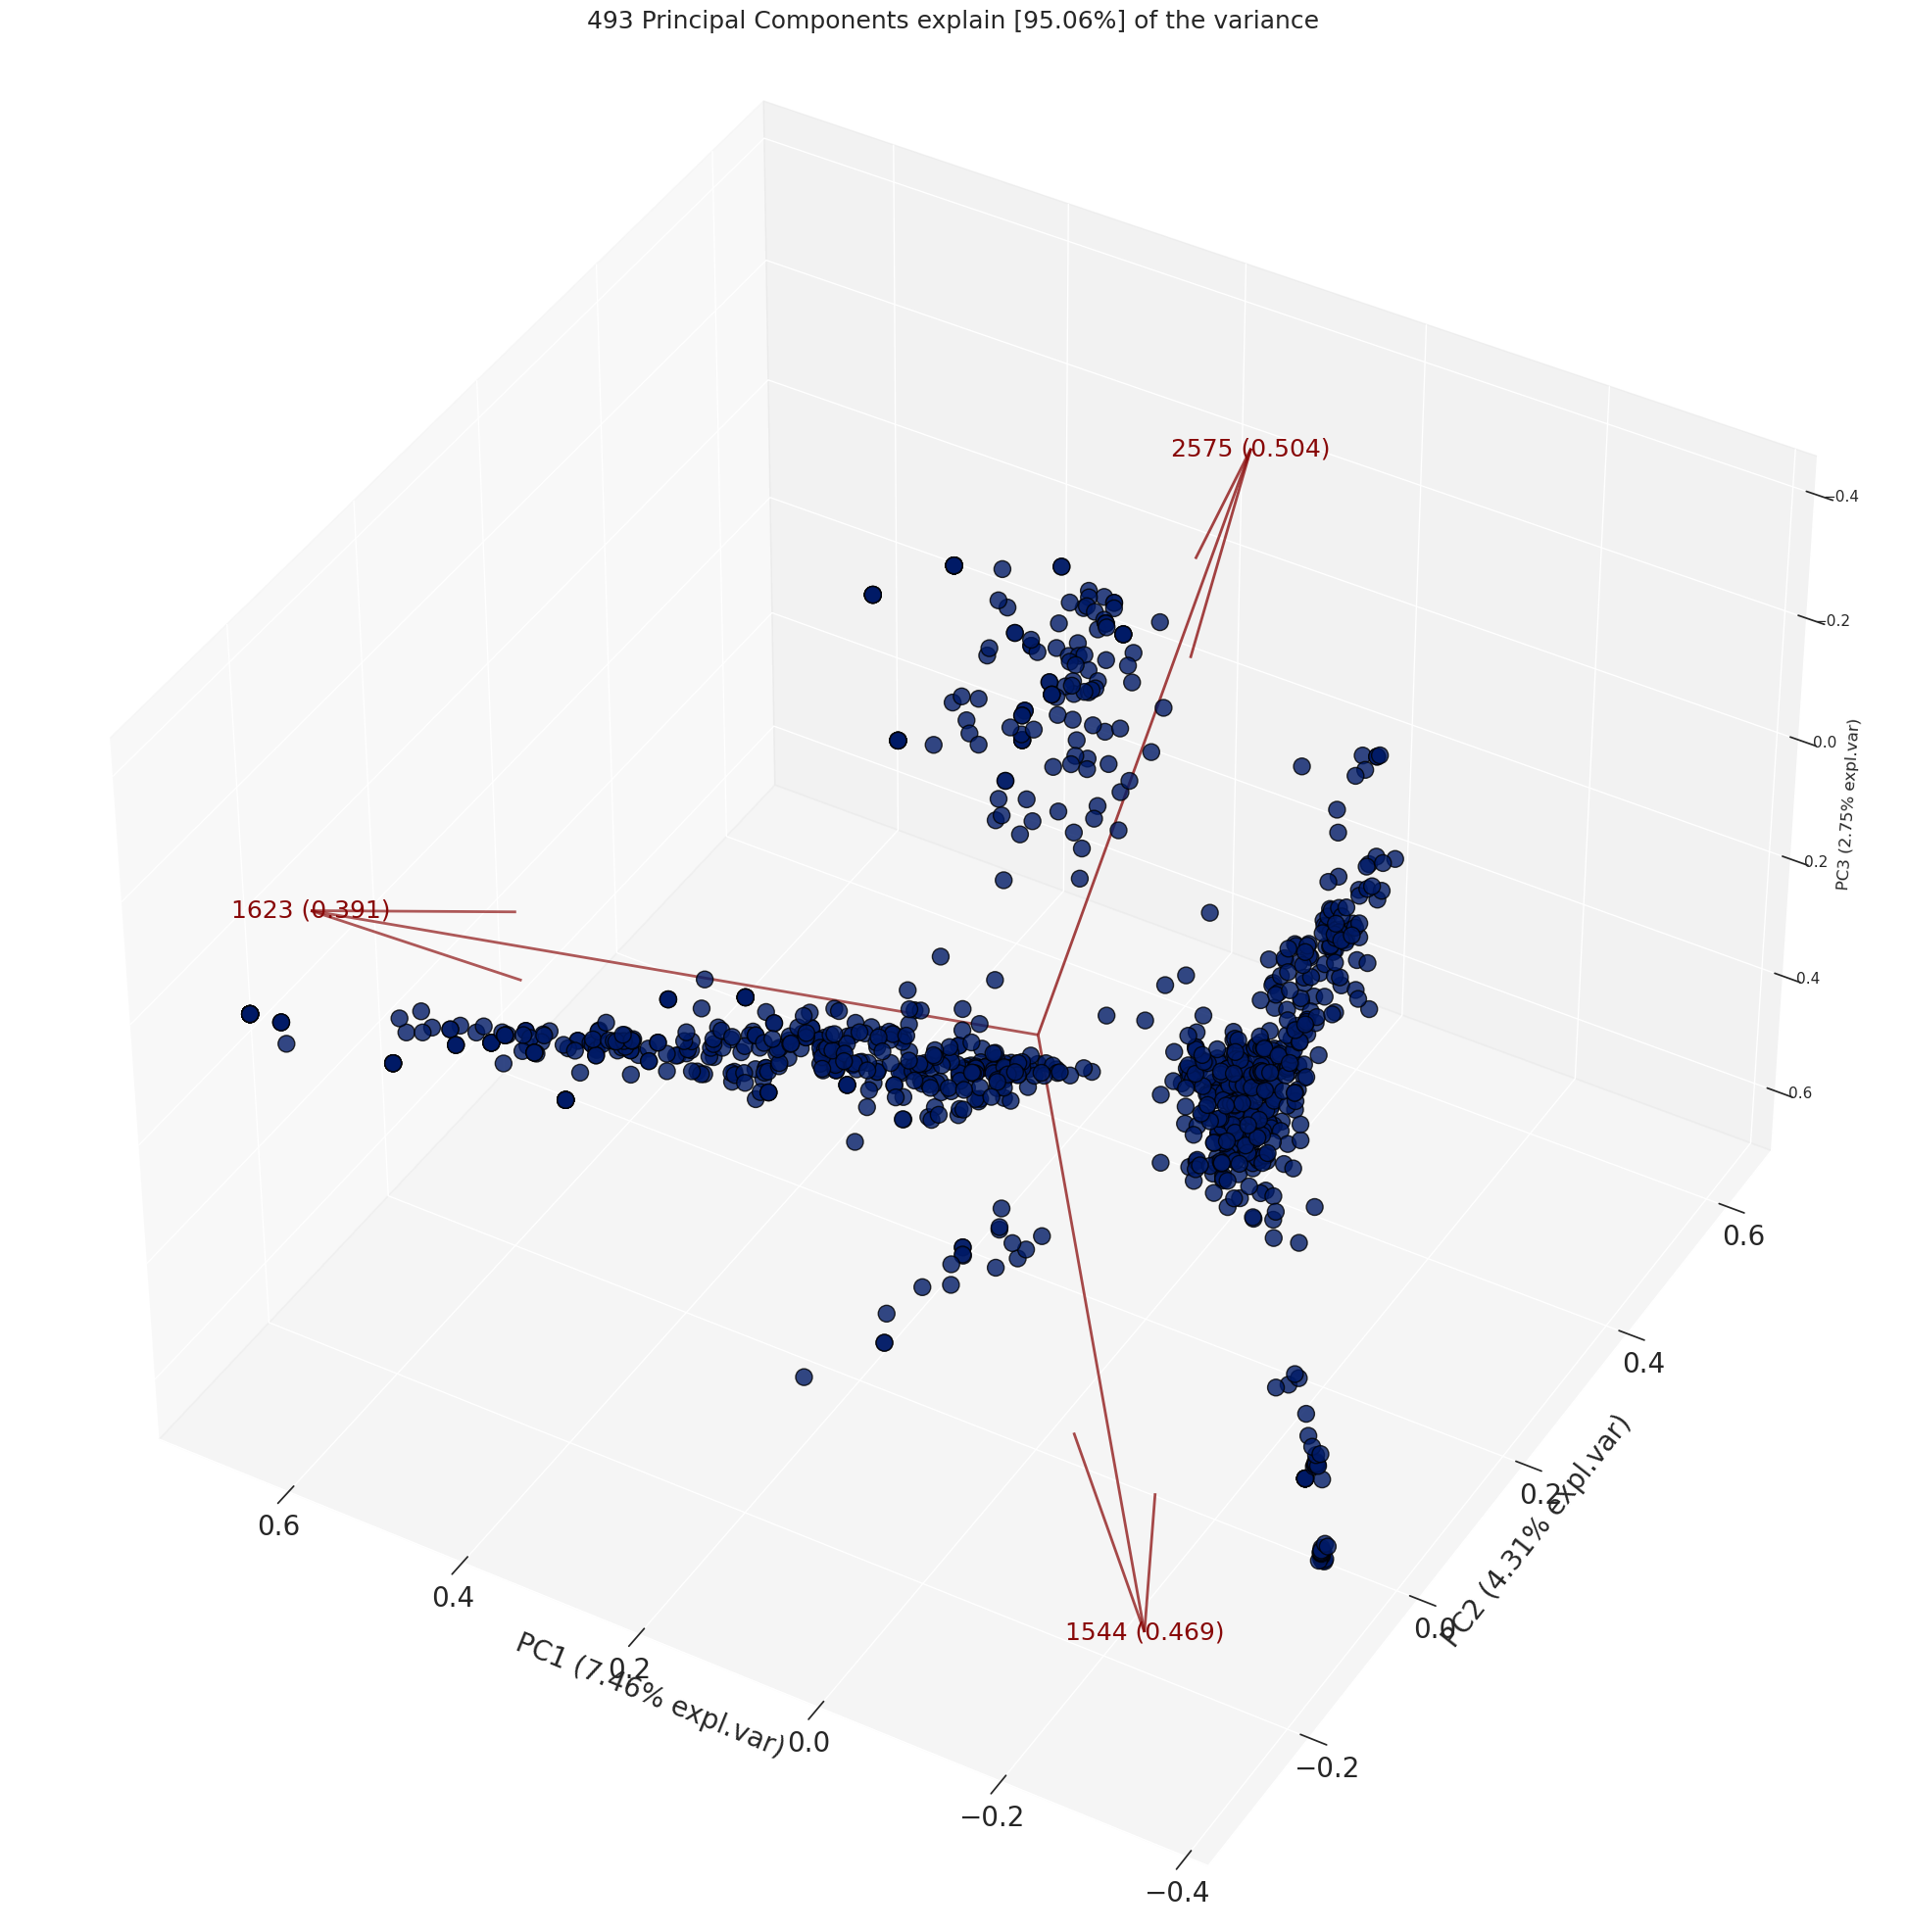

In [48]:
ax = model_pca.biplot3d(n_feat=3, legend=False)

## Réduction et représentation TF-IDF avec PCA

In [50]:
liste_categories = list(df['category'].value_counts().index)
colormap = []
for categorie in df['category']:
    colormap.append(plt.cm.Set2(liste_categories.index(categorie)))

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_tfidf.toarray())

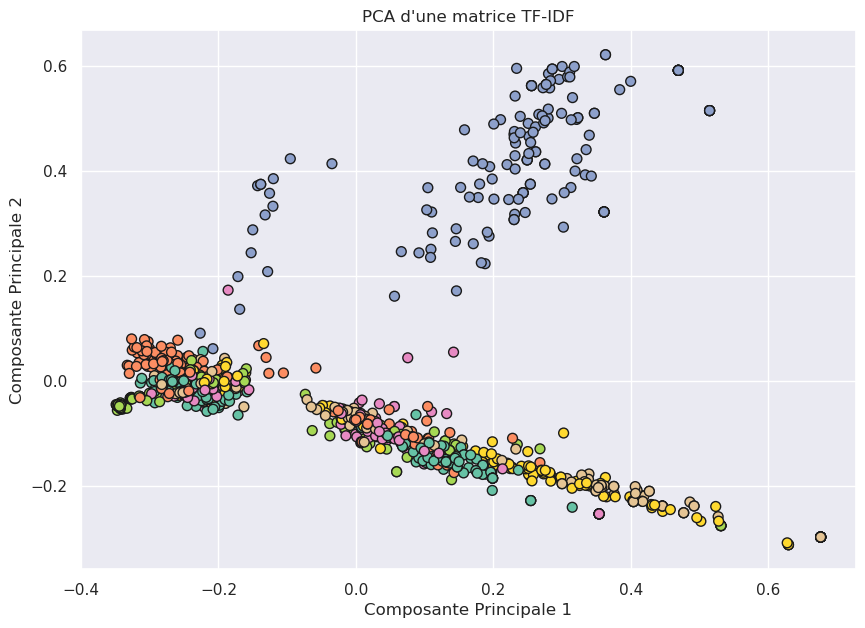

In [52]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colormap, edgecolor='k', s=50)
plt.title('PCA d\'une matrice TF-IDF')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

# Industrialisation modèles textuels

## Prépatation pour comparaison des résultats

In [55]:
import os
os.environ["OMP_NUM_THREADS"] = '4'

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

In [56]:
liste_categories = list(df['category'].value_counts().index)
categories_reelles = []
for categorie in df['category']:
    categories_reelles.append(liste_categories.index(categorie))

In [57]:
resultatsModeles = pd.DataFrame()

def testResultModel(variables,nom_modele=None,tps_modele=0):
    """
    Calcul du Tsne
    Création des clusters
    Calcul ARI
    """
    if nom_modele:
        print(68*"_")
        print(f'Modèle : {nom_modele}')
        print(68*"_")

    temps_debut = time.time()
    nb_labels = len(liste_categories)

    # Calcul du TSNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=2000,
                init='random', learning_rate=200, random_state=42)
    tsne_result = tsne.fit_transform(variables)

    # Création des clusters
    cluster = KMeans(n_clusters=nb_labels, n_init=100, random_state=42)
    cluster.fit(tsne_result)

    # Calcul de l'ari
    ari = np.round(adjusted_rand_score(categories_reelles, cluster.labels_),4)
    temps_total = np.round(time.time() - temps_debut + tps_modele,4)
    print(f' durée transform : {temps_total}      ARI --> {ari}\n')
    graphResultModel(tsne_result,categories_reelles,cluster.labels_)
    return[nom_modele,temps_total,ari,tsne_result,cluster.labels_]

def graphResultModel(tsne_result,categories_reelles,labels):
    fig = plt.figure(figsize=(18,8))
    ax = fig.add_subplot(121)
    scatter = ax.scatter(tsne_result[:,0],tsne_result[:,1], c=labels, cmap='Set2')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des clusters calculés')
    ax = fig.add_subplot(122)
    scatter = ax.scatter(tsne_result[:,0],tsne_result[:,1], c=categories_reelles, cmap='Set2')
    ax.legend(handles=scatter.legend_elements()[0], labels=liste_categories, loc="best", title="Catégories")
    plt.title('Représentation d\'après les catégories réelles')
    plt.show()

In [58]:
def saveResults(toSave):
    global resultatsModeles
    if 'Modèle' in resultatsModeles.columns:
        modeles_existants = dict(resultatsModeles['Modèle'])
        if toSave[0] in modeles_existants.values(): # si enregistrement existe on met a jour
            id = resultatsModeles.loc[resultatsModeles['Modèle']==toSave[0]].index[0]
            print(f'modèle existant on met à jour lindex {id}')
            resultatsModeles.iloc[id,1] = toSave[1]
            resultatsModeles.iloc[id,2] = toSave[2]
        else:
            print(f'modèle inconnu on ajoute') # si enregistrement n'existe pas on ajoute
            resultatsModeles = resultatsModeles._append({'Modèle': toSave[0], 'Temps': toSave[1], 'ARI': toSave[2]}, ignore_index=True)
    else:
        # premier enregistrement
        resultatsModeles = resultatsModeles._append({'Modèle': toSave[0], 'Temps': toSave[1], 'ARI': toSave[2]}, ignore_index=True)


## Sauvegarde durée cleaning

In [60]:
saveResults(['Cleaning Corpus',temps_cleaning,''])

## Modèle : BagOfWords + CountVectorizer

____________________________________________________________________
Modèle : BagOfWords + CountVectorizer
____________________________________________________________________
 durée transform : 5.0325      ARI --> 0.3663



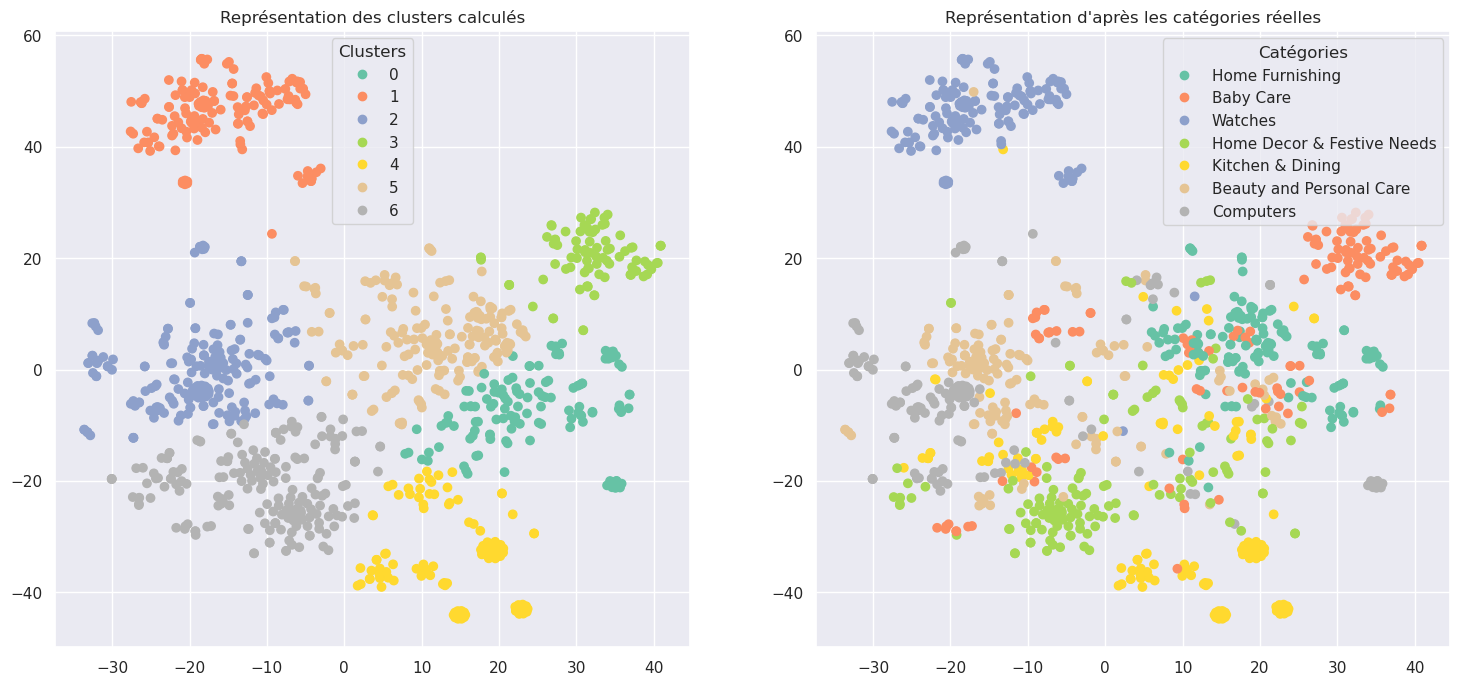

modèle inconnu on ajoute


In [62]:
resultat = testResultModel(BoW_X_dense,nom_modele='BagOfWords + CountVectorizer',tps_modele=temps_CountVectorizer)
saveResults(resultat)

## Modèle : BagOfWords + Tfidf

____________________________________________________________________
Modèle : BagOfWords + Tfidf
____________________________________________________________________
 durée transform : 4.544      ARI --> 0.4351



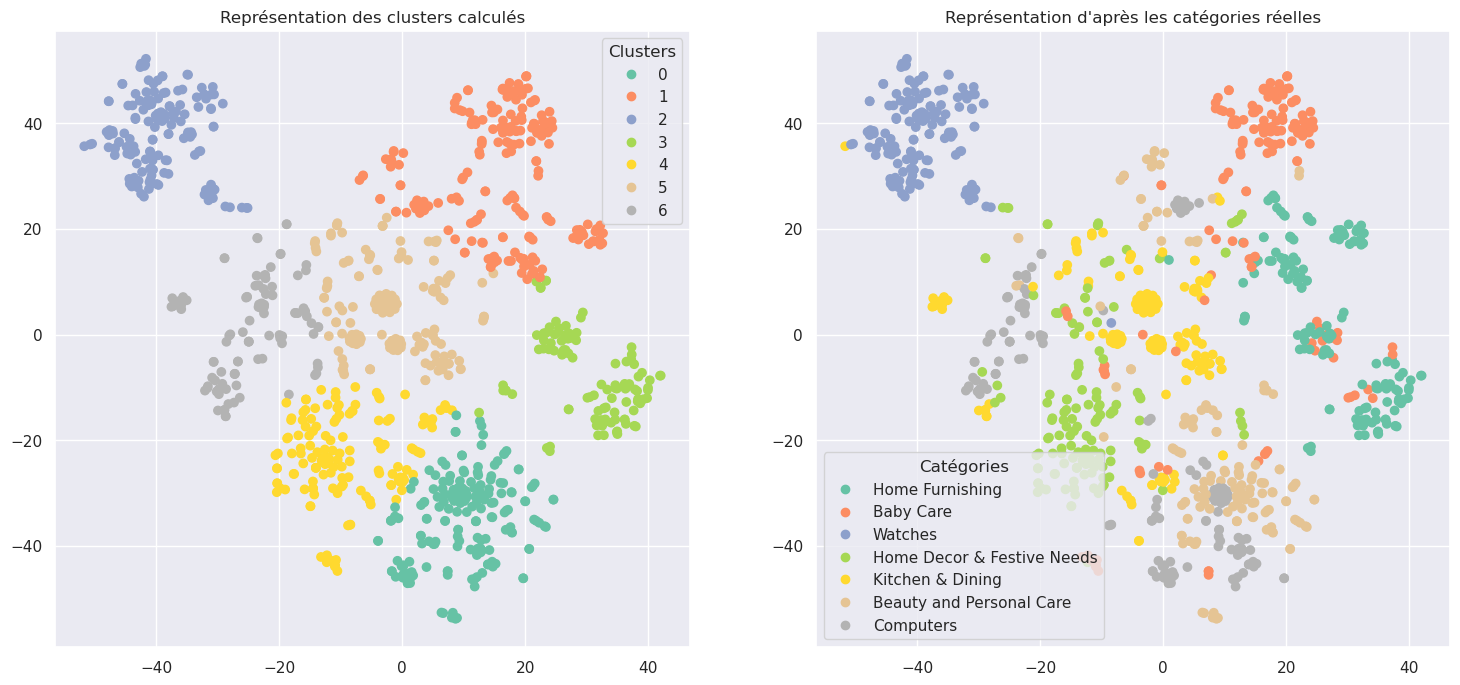

modèle inconnu on ajoute


In [64]:
resultat = testResultModel(X_tfidf,nom_modele='BagOfWords + Tfidf',tps_modele=temps_TfidfVectorizer)
saveResults(resultat)

## Modèle : Doc2Vec

In [66]:
import gensim
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from nltk.tokenize import word_tokenize
 
corpus = df.description

temps_d2v2_debut = time.time()
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()),
                              tags=[str(i)]) for i,
               doc in enumerate(corpus)]
 
model_d2v2 = Doc2Vec(vector_size=20, min_count=2, epochs=50)
model_d2v2.build_vocab(tagged_data)
model_d2v2.train(tagged_data,
            total_examples=model_d2v2.corpus_count,
            epochs=model_d2v2.epochs)
 
document_vectors = [model_d2v2.infer_vector(
    word_tokenize(doc.lower())) for doc in corpus]

X_d2v2 =  np.zeros(20, dtype=object)
for i, doc in enumerate(corpus):
    X_d2v2 = np.vstack([X_d2v2, document_vectors[i]])
X_d2v2 = np.nan_to_num(X_d2v2[1:1051])
temps_d2v2 = np.round(time.time() - temps_d2v2_debut,4)

In [67]:
X_d2v2.shape

(1050, 20)

____________________________________________________________________
Modèle : Doc2Vec
____________________________________________________________________
 durée transform : 12.4952      ARI --> 0.23



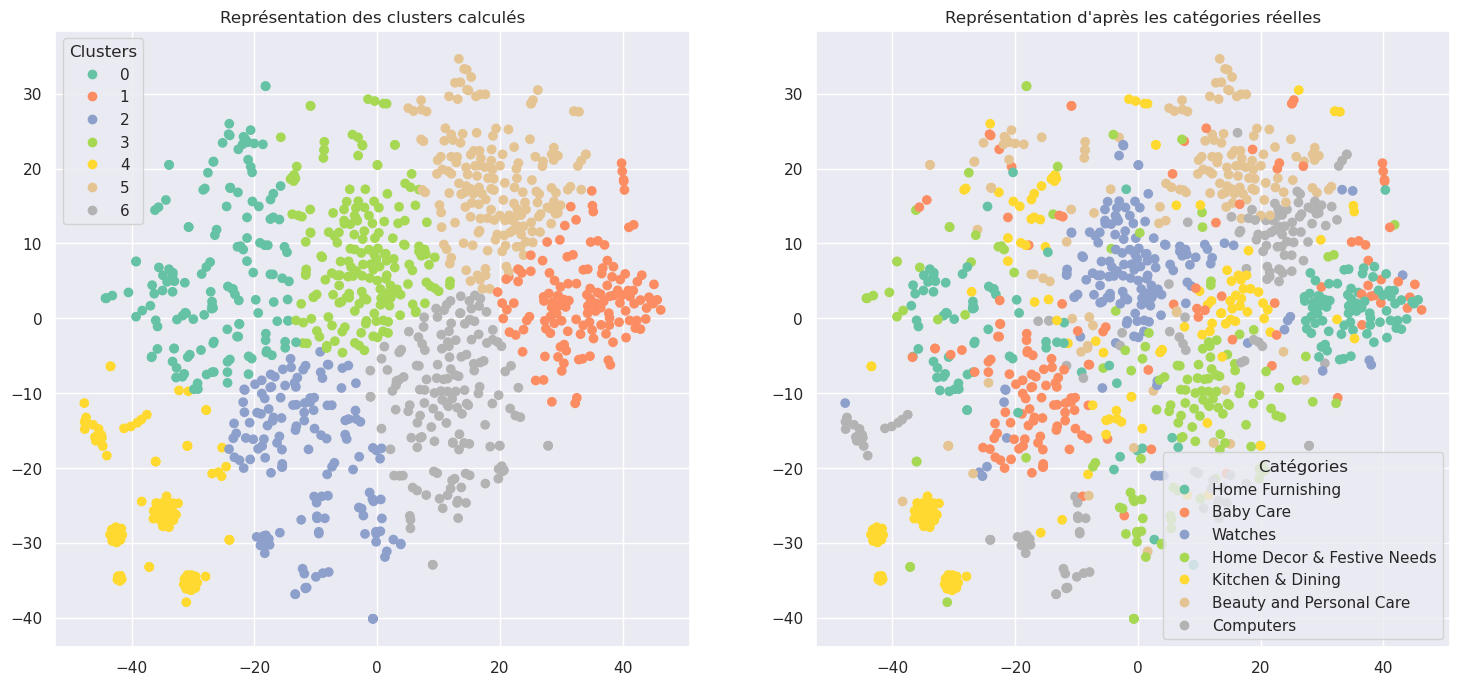

modèle inconnu on ajoute


In [68]:
resultat = testResultModel(X_d2v2,nom_modele='Doc2Vec',tps_modele=temps_d2v2)
saveResults(resultat)

## Modèle : BERT

In [70]:
import torch
from transformers import BertTokenizer, BertModel

temps_bert_debut = time.time()
tokenizer_bert = BertTokenizer.from_pretrained('google-bert/bert-base-uncased')
model_bert = BertModel.from_pretrained('google-bert/bert-base-uncased')

def vectorisation_bert(document):
    """ Fonction pour traiter la vectorisation"""
    document2tokens = tokenizer_bert(document, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        resultVector = model_bert(**document2tokens)
    return resultVector.last_hidden_state.mean(dim=1).numpy()

X_bert_temp = []
for i, document in enumerate(df['description']):
    X_bert_temp.append(vectorisation_bert(document))
    sys.stdout.write(f"\rTraitement du document {i+1}/{len(df.index)}")
    sys.stdout.flush()
    
X_bert = np.array([vecteur.flatten() for vecteur in X_bert_temp])
temps_bert = np.round(time.time() - temps_bert_debut,4)

C:\Users\cedric\anaconda3\envs\python3-9\lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Traitement du document 1050/1050

In [71]:
X_bert.shape

(1050, 768)

____________________________________________________________________
Modèle : Bert
____________________________________________________________________
 durée transform : 90.2675      ARI --> 0.3009



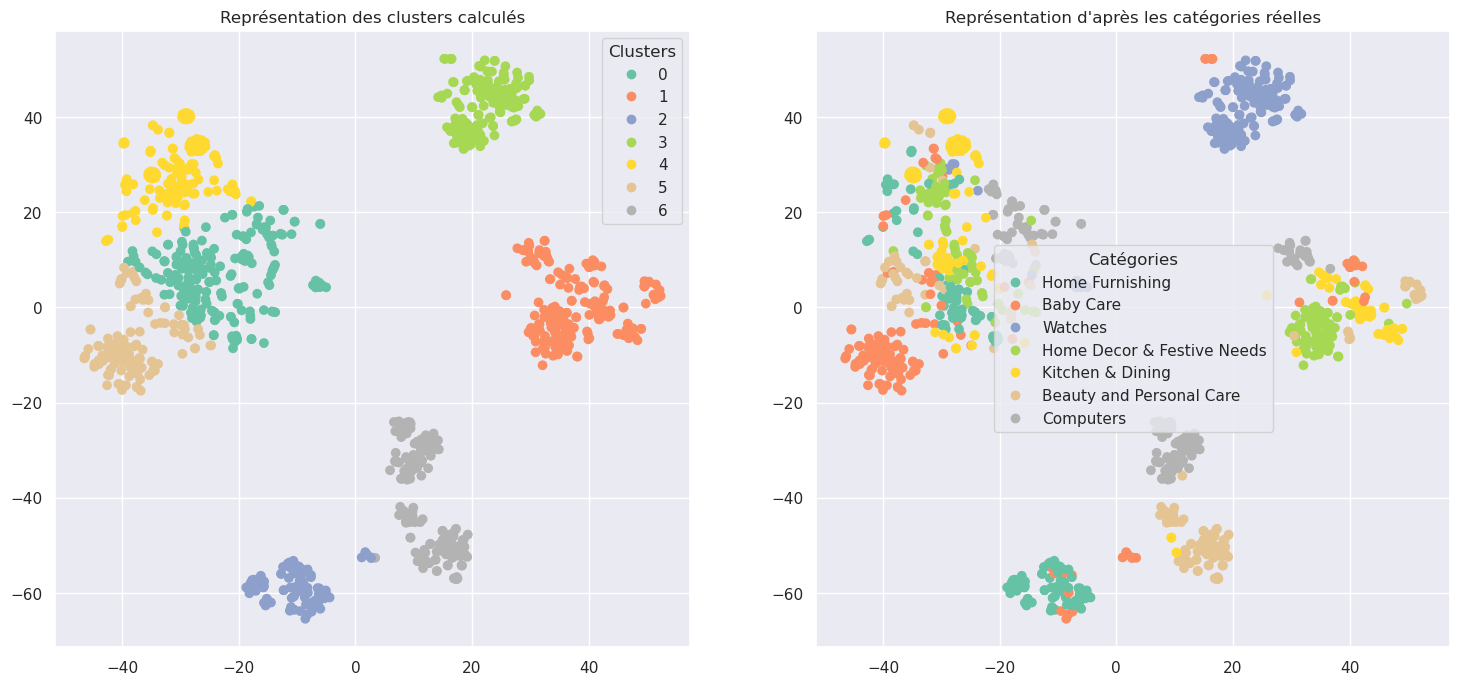

modèle inconnu on ajoute


In [72]:
resultat = testResultModel(X_bert,nom_modele='Bert',tps_modele=temps_bert)
saveResults(resultat)

## Modèle : USE

In [74]:
import tensorflow_hub as hub
import tensorflow as tFlow

temps_use_debut = time.time()
model_use = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")

def vectorisation_use(document):
    """ Fonction pour traiter la vectorisation"""        
    return model_use(tFlow.convert_to_tensor([document])).numpy()

X_use_temp = []
for i, document in enumerate(df['description']):
    X_use_temp.append(vectorisation_use(document))
    sys.stdout.write(f"\rTraitement du document {i+1}/{len(df.index)}")
    sys.stdout.flush()

X_use = np.array([vecteur.flatten() for vecteur in X_use_temp])
temps_use = np.round(time.time() - temps_use_debut,4)

Traitement du document 1050/1050

In [75]:
X_use.shape

(1050, 512)

____________________________________________________________________
Modèle : Use
____________________________________________________________________
 durée transform : 13.898      ARI --> 0.4504



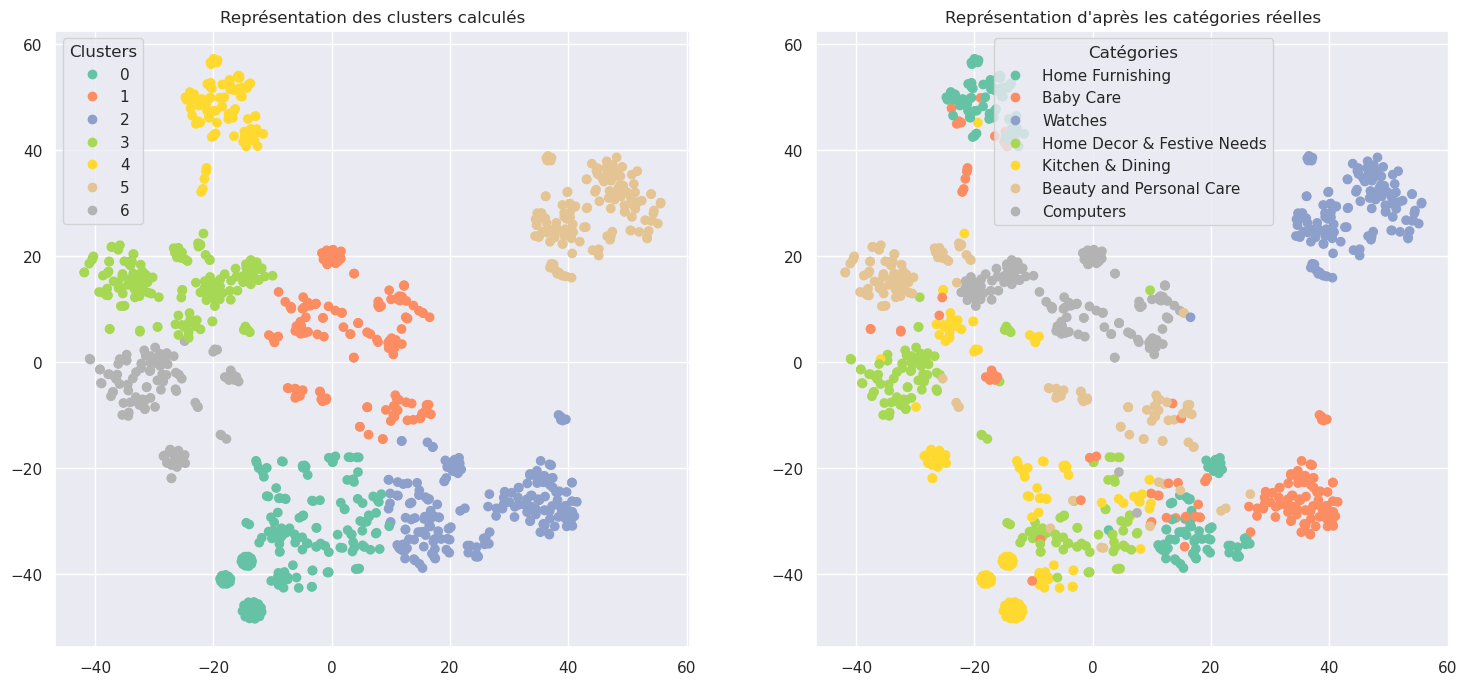

modèle inconnu on ajoute


In [76]:
resultat = testResultModel(X_use,nom_modele='Use',tps_modele=temps_use)
saveResults(resultat)

## Résultats des modèles Textuels

In [78]:
resultatsModeles

Modèle    Temps     ARI
0               Cleaning Corpus  92.2985        
1  BagOfWords + CountVectorizer   5.0325  0.3663
2            BagOfWords + Tfidf   4.5440  0.4351
3                       Doc2Vec  12.4952    0.23
4                          Bert  90.2675  0.3009
5                           Use  13.8980  0.4504

# Traitement des images

In [80]:
%matplotlib inline
import re
from os import walk

def CreationDir(dossier):
    """
    Crée le répertoire si il n'existe pas
    """
    if not os.path.exists(dossier):
        os.makedirs(dossier)

In [81]:
dossierImageSource = "data/source/images/"  # chemin ou déposer les images
dossierImageTraitees = "data/traitees/images/"   # chemin ou déposer les exports

## Récuperation des images présentes dans le repertoire

In [83]:
for (dirpath, dirnames, filenames) in walk(dossierImageSource):
    for diname in dirnames:
        if ~(dirnames == '.ipynb_checkpoints'):
            liste_images = filenames
            print(f'nombre d\'images: {len(filenames)}')

nombre d'images: 1050


## Fonction de retraitement des images

In [85]:
import cv2
def imageTraitement(image,step=4,view=False):
    """
    Fonction de traitement des images
    image (chemin+nom) : image a traiter
    step [1,2,3,4] : 1 Grayscale
                     2 Grayscale + Debruitée
                     3 Grayscale + Debruitée + Egalisee
                     4 Grayscale + Debruitée + Egalisee + Floutee
    View [True/False] : affiche les étapes de transformation
    """
    imageRaw = cv2.imread(image)
    imageOriginale = cv2.cvtColor(imageRaw, cv2.COLOR_BGR2RGB)
    imageGreyscale = cv2.cvtColor(imageOriginale, cv2.COLOR_BGR2GRAY)
    imageDebruitee = cv2.medianBlur(imageGreyscale, 3)
    imageEgalisee = cv2.equalizeHist(imageDebruitee)
    imageFloutee = cv2.GaussianBlur(imageEgalisee,(5,5),0)

    if step == 1:
        imageSortie = imageGreyscale
    if step == 2:
        imageSortie = imageDebruitee        
    if step == 3:
        imageSortie = imageEgalisee
    else:
         imageSortie = imageFloutee       
       
    if view == True:
        fig, axs = plt.subplots(step+1, figsize=(5, (step+1)*5))
        for i in range(0, step+1, 1):
            axs[i].grid(False)
            axs[i].set_xticks([])
            axs[i].set_yticks([])
        axs[0].set_title('Originale')
        axs[0].imshow(imageOriginale)
        axs[1].set_title('Greyscale')
        axs[1].imshow(imageGreyscale, cmap='gray')
        if step > 1:
            axs[2].set_title('Debruitée')
            axs[2].imshow(imageDebruitee, cmap='gray')
        if step > 2:
            axs[3].set_title('Egalisée')
            axs[3].imshow(imageEgalisee, cmap='gray')
        if step > 3:
            axs[4].set_title('Floutée')
            axs[4].imshow(imageFloutee, cmap='gray')
        plt.show()

    return imageSortie
        

In [86]:
liste_images[42]

'dfbd96036cbc28566e964cff04b5b3a8.jpg'

### Définition d'une image pour tester le prétraitement

In [88]:
imageTest = dossierImageSource+liste_images[42]

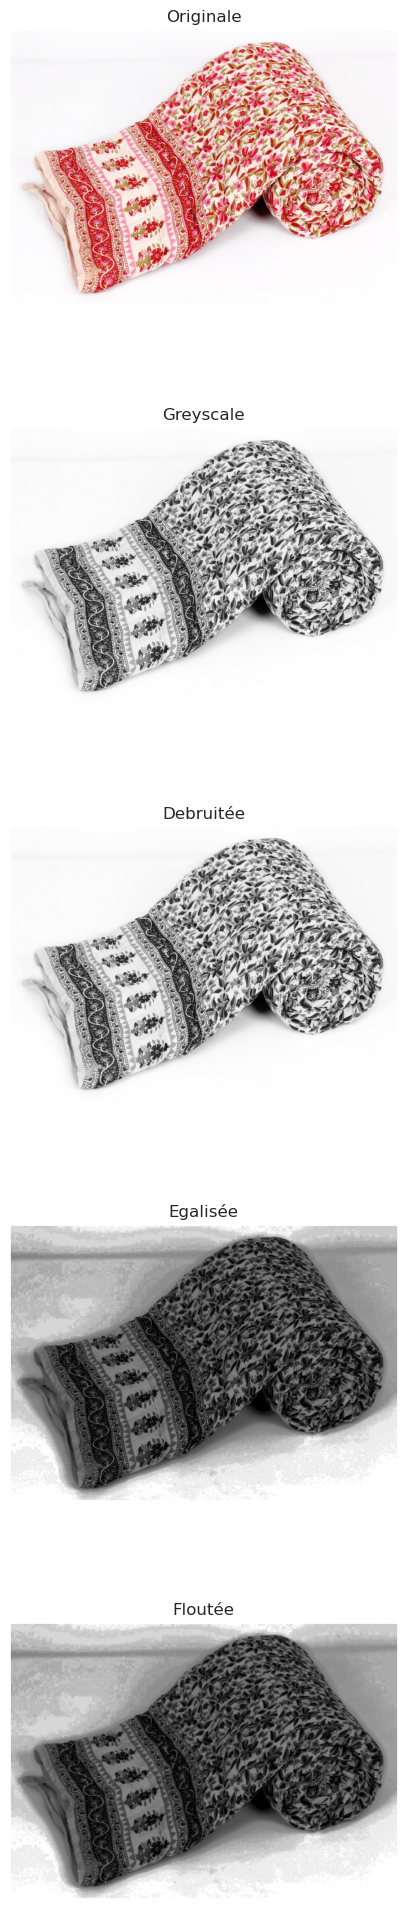

array([[214, 214, 214, ..., 201, 201, 201],
       [214, 214, 214, ..., 201, 201, 201],
       [214, 214, 214, ..., 202, 202, 202],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [89]:
imageTraitement(imageTest,step=4,view=True)


## Modèle SIFT

### Fonction d'extraction des features

In [92]:
def imageExtractKeys(image,step=4,view=False,save=False,nb_features_max=None):
    """
    Fonction extraction descripteurs des images
    image (chemin+nom) : image a traiter
    step [1,2,3,4] : 1 Grayscale
                     2 Grayscale + Debruitée
                     3 Grayscale + Debruitée + Egalisee
                     4 Grayscale + Debruitée + Egalisee + Floutee
    view [True/False] : affiche l'image avec les points particuliers
    save [True/False] : sauvegarde l'image avec les points particuliers
    nb_features_max [int] : nombre max de features a garder
    """
    imageRaw = imageTraitement(image,step)
    sift = cv2.xfeatures2d.SIFT_create(nb_features_max)
    keyPoints, descripteurs = sift.detectAndCompute(imageRaw, None)
    if view == True | save == True:
        imageKeyPoints = cv2.drawKeypoints(imageRaw, keyPoints, None)
        if view == True:
            plt.imshow(imageKeyPoints)
            plt.grid(False)
            plt.xticks([])
            plt.yticks([])
            plt.show()
        if save == True:
            imageSaveDir = image.replace(dossierImageSource, dossierImageTraitees)
            imageSave = imageSaveDir.replace(".jpg", "-KeyPoints.jpg")
            cv2.imwrite(imageSave,imageKeyPoints)
    return descripteurs

### Test d'extraction

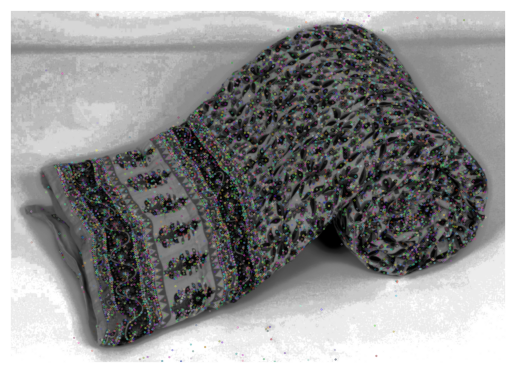

Descripteurs :  (9163, 128)

[[ 41.   9.   2. ...   0.   0.   0.]
 [154.   4.   0. ...   1.   0.   0.]
 [  0.   0.  41. ...   1.  17.  24.]
 ...
 [ 54.  18.   0. ...   0.   0.   1.]
 [ 56.  41.   3. ...   0.   0.   9.]
 [ 38.   1.   0. ...   0.   0.  10.]]


In [94]:
descript = imageExtractKeys(imageTest, view=True, save=True)
print("Descripteurs : ", descript.shape)
print()
print(descript)

### Créations des descripteurs de chaque image

In [96]:
sift_keypoints = []
temps_siftDesc_debut = time.time()
maxFeatures = 500 # nombre de features max par image

for image_num in df.index :
    sys.stdout.write(f"\rTraitement de l'image {image_num+1}/{len(df.index)}")
    sys.stdout.flush()
    descript = imageExtractKeys(dossierImageSource+df.image[image_num],step=3,nb_features_max=maxFeatures)
    #print (f'{descript.shape} - {df.image[image_num]}')
    if descript.shape[0] > maxFeatures: # limitation du nombre de features
        descript = descript[:maxFeatures,:]
    if descript.shape[0] < maxFeatures: # ajout de vecteurs nuls si plus petit
        fill_amount = maxFeatures - descript.shape[0]
        for num in range(fill_amount):
            descript = np.vstack([descript, np.zeros(128, dtype=object)])     
    sift_keypoints.append(descript)
    #if image_num > 10: break # limitation du nombre d'images pour mise au point

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

temps_siftDesc = round(time.time() - temps_siftDesc_debut, 4)
print("temps de traitement des descripteurs SIFT : ", "%15.2f" % temps_siftDesc, "secondes")

Traitement de l'image 1050/1050
Nombre de descripteurs :  (525000, 128)
temps de traitement des descripteurs SIFT :           402.55 secondes


### Création des clusters de descripteurs

In [98]:
from sklearn import cluster, metrics

sift_keypoints_all = np.nan_to_num(sift_keypoints_all)

temps_siftClust_debut = time.time()

# Determination number of clusters
kClust = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", kClust)
print("Création de",kClust, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=kClust, init_size=3*kClust, random_state=0)
kmeans.fit(sift_keypoints_all)

temps_siftClust = round(time.time() - temps_siftClust_debut, 4)
print("temps de traitement kmeans : ", "%15.2f" % temps_siftClust, "secondes")

Nombre de clusters estimés :  725
Création de 725 clusters de descripteurs ...
temps de traitement kmeans :             9.12 secondes


### Création des features des images

In [100]:
# Creation of histograms (features)
temps_siftFeat_debut = time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print(" --> problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    sys.stdout.write(f"\rCreation de l'histogramme {i+1}/{len(sift_keypoints_by_img)}")
    sys.stdout.flush()
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

temps_siftFeat = round(time.time() - temps_siftFeat_debut, 4)
print()
print("temps de création des histogrammes : ", "%15.2f" % temps_siftFeat, "secondes")


Creation de l'histogramme 1050/1050
temps de création des histogrammes :             7.54 secondes


### Reduction de dimension des features avec une PCA

In [102]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 725)
Dimensions dataset après réduction PCA :  (1050, 465)


### Résultat modélisation SIFT

____________________________________________________________________
Modèle : Sift
____________________________________________________________________
 durée transform : 426.2138      ARI --> 0.0405



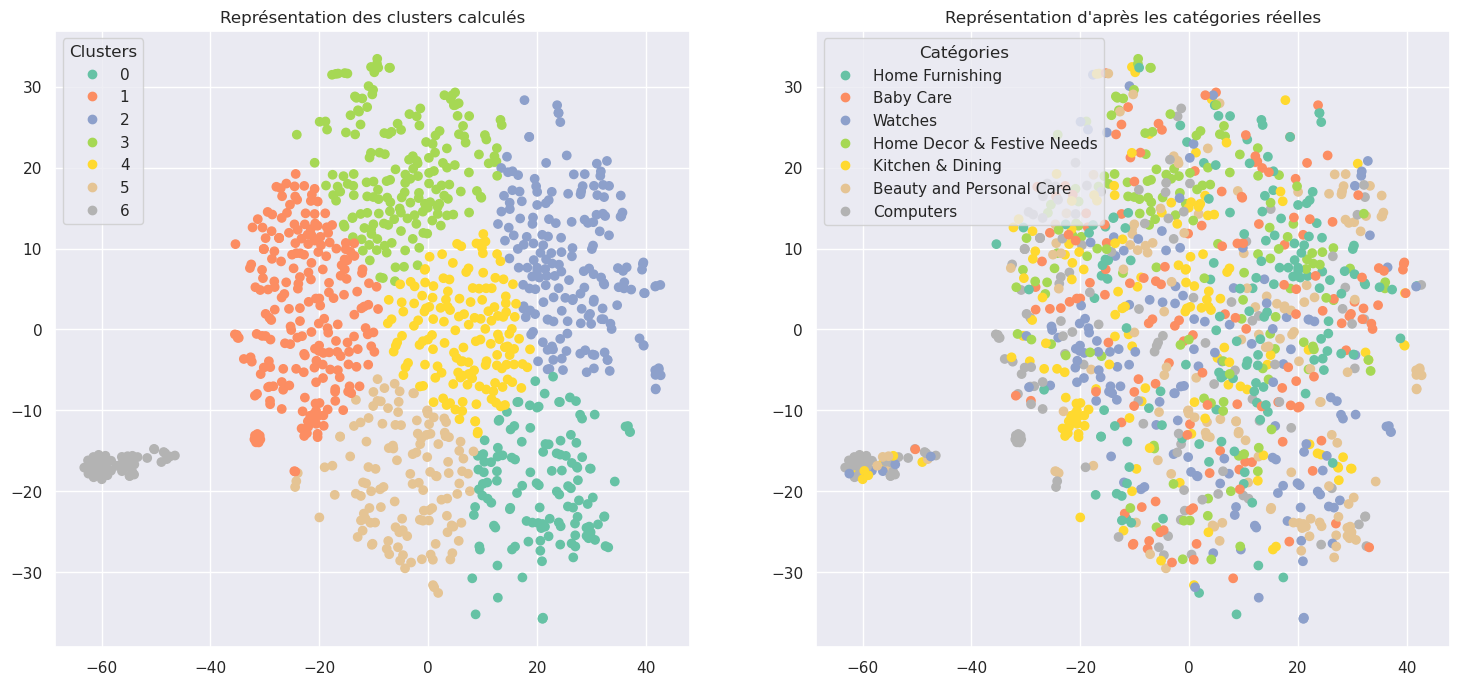

modèle inconnu on ajoute


In [104]:
temps_sift = temps_siftDesc + temps_siftClust + temps_siftFeat
resultat = testResultModel(feat_pca,nom_modele='Sift',tps_modele=temps_sift)
saveResults(resultat)

## Modèle Cnn VGG16

In [106]:
# load pretrained VGG16 model from keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

modelVgg16Origine = VGG16()
modelVgg16 = Model(inputs=modelVgg16Origine.inputs, outputs=modelVgg16Origine.layers[-2].output)
modelVgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [107]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image

temps_vgg16_debut = time.time()

# Pour charger des images de grande taille
Image.MAX_IMAGE_PIXELS = None

# Initialiser une liste vide pour stocker les caractéristiques des images
imagesFeatures = []

for image_num in df.index :
    sys.stdout.write(f"\rTraitement de l'image {image_num+1}/{len(df.index)}")
    sys.stdout.flush()
    imageFile = dossierImageSource+df.image[image_num]
    imageLoad = load_img(imageFile, target_size=(224, 224))
    imageArray = img_to_array(imageLoad) 
    imageExpand = np.expand_dims(imageArray, axis=0)
    image2Process = preprocess_input(imageExpand)
    imageFeature = modelVgg16.predict(image2Process, verbose=0)[0]
    imagesFeatures.append(imageFeature)
temps_vgg16 = round(time.time() - temps_vgg16_debut, 4)

Traitement de l'image 1050/1050

In [108]:
vgg16Features = np.array(imagesFeatures)
vgg16Features.shape

(1050, 4096)

### Reduction de dimension des features avec une PCA

In [110]:
from sklearn import manifold, decomposition

print(vgg16Features.shape)
pca = decomposition.PCA(n_components=0.99)
vgg16Featurespca= pca.fit_transform(vgg16Features)
print(vgg16Featurespca.shape)

(1050, 4096)
(1050, 803)


### Résultat modélisation VGG16

____________________________________________________________________
Modèle : Vgg16
____________________________________________________________________
 durée transform : 281.7884      ARI --> 0.4683



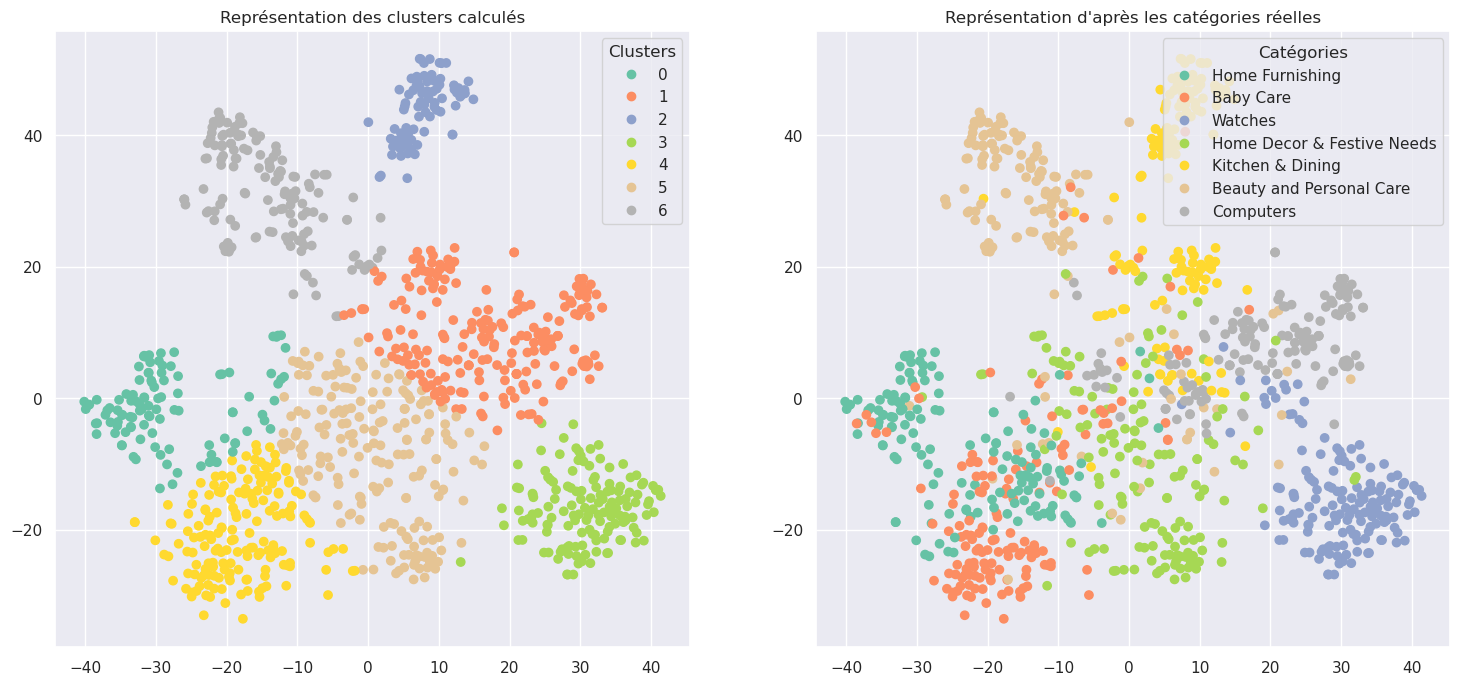

modèle inconnu on ajoute


In [112]:
resultat = testResultModel(vgg16Featurespca,nom_modele='Vgg16',tps_modele=temps_vgg16)
saveResults(resultat)

## Résultats de tous les modèles

In [114]:
resultatsModeles

Modèle     Temps     ARI
0               Cleaning Corpus   92.2985        
1  BagOfWords + CountVectorizer    5.0325  0.3663
2            BagOfWords + Tfidf    4.5440  0.4351
3                       Doc2Vec   12.4952    0.23
4                          Bert   90.2675  0.3009
5                           Use   13.8980  0.4504
6                          Sift  426.2138  0.0405
7                         Vgg16  281.7884  0.4683